Importiamo `numpy` e `matplotlib`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Creiamo la classe `Plotter` per facilitare il plot dei grafici

In [2]:
# Adapted from https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/


class Plotter:
    """The class defines some colors by default (4):

    Colors:
        Plotter.blue = #1190FF
        Plotter.orange = #FF9A13
        Plotter.darkgray = #A9A9A9
        Plotter.black = #020101
    """

    # default colors
    blue = "#1190FF"
    orange = "#FF9A13"
    darkgray = "#A9A9A9"
    black = "#020101"

    def plot_vectors(vectors: list, colors: list, alpha: float = 1):
        """Plots a set of (colored) vectors

        Args:
            vectors (list): Coordinates of vectors to plot. Each vector is an
                array, i.e. [[1, 3] [2, 2]] can be used to plot 2 vectors
            colors (list): Colors of vectors to plot. i.e. [Plotter.red, 
                Plotter.blue] will result in the first vector being red and the 
                second being blue.
            alpha (float, optional): Opacity of vectors. Value must be within
                the 0-1 range Defaults to 1.

        Raises:
            ValueError: Vectors and colors must be the same length

        Returns:
            Figure (class): A matplotlib matplotlib.figure.Figure object.
                Figure contains basis vectors.
        """
        if len(vectors) != len(colors):
            raise ValueError("Vectors and colors must be the same length")

        plt.figure()
        plt.axvline(x=0, color=Plotter.darkgray, zorder=0)
        plt.axhline(y=0, color=Plotter.darkgray, zorder=0)

        for i, vector in enumerate(vectors):
            x = np.concatenate([[0, 0], vector])
            plt.quiver(
                [x[0]],
                [x[1]],
                [x[2]],
                [x[3]],
                angles="xy",
                scale_units="xy",
                scale=1,
                color=colors[i],
                alpha=alpha,
            )

    def matrix_transform(matrix: np.ndarray, vcolors: list = [orange, blue]):
        """Modify the unit circle and basis vectors by applying the given
            matrix. Visualize the effect of the matrix in 2D.

        Args:
            matrix (np.ndarray): 2D matrix to apply to the unit circle.
            vcolors (list, optional): Colors of the basis vectors (in HEX).
                Defaults to [orange, blue].

        Returns:
            Figure (class): A matplotlib matplotlib.figure.Figure object.
                Figure contains modified unit circle and basis vectors.
        """
        # Unit circle
        x = np.linspace(-1, 1, 100000)
        y = np.sqrt(1 - (x**2))

        # Modified unit circle (separate negative and positive parts)
        x1 = matrix[0, 0] * x + matrix[0, 1] * y
        y1 = matrix[1, 0] * x + matrix[1, 1] * y
        x1_neg = matrix[0, 0] * x - matrix[0, 1] * y
        y1_neg = matrix[1, 0] * x - matrix[1, 1] * y

        # Vectors
        u1 = [matrix[0, 0], matrix[1, 0]]
        v1 = [matrix[0, 1], matrix[1, 1]]

        Plotter.plot_vectors([u1, v1], vcolors)

        plt.plot(x1, y1, "g", alpha=0.5)
        plt.plot(x1_neg, y1_neg, "g", alpha=0.5)
        
    def plot(matrix: np.ndarray, lim: float, title: str) -> plt.Figure:
        """Facilitate the plotting of the modified unit circle and basis
            vectors.

        Args:
            matrix (np.ndarray): 2D matrix to apply to the unit circle
            lim (float): The x, y limits of the graph
            title (str): The title of the graph

        Returns:
            plt.Figure: A matplotlib matplotlib.figure.Figure object
        """
        Plotter.matrix_transform(matrix)
        plt.xlim(-lim, lim)
        plt.ylim(-lim, lim)
    
        plt.title(title)
        plt.show()

Possiamo usare la classe per controllare che le tre trasformazioni ottenute
dalla SVD sono equivalenti alle trasformazioni fatte con la matrice originale.
Disegniamo i due step. Usiamo la matrice

$$A = \begin{bmatrix} 3 & 7 \\ 5 & 2 \end{bmatrix}$$

Per tracciare il grafico:

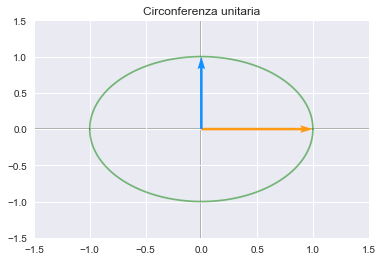

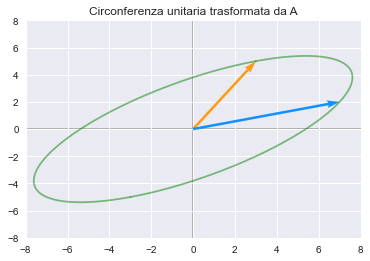

In [3]:
plt.style.use("seaborn")   # utilizza lo stile seaborn
pl = Plotter

A = np.array([[3, 7], [5, 2]])
B = np.array([[1, 0], [0, 1]])
    
pl.plot(B, 1.5, "Circonferenza unitaria")
pl.plot(A, 8, "Circonferenza unitaria trasformata da A")

Questo è ciò che otteniamo applicando la matrice $A$ alla circonferenza unitaria
e ai vettori di base. Questi non sono stati ruotati allo stesso modo, questo
dipende dal segno del determinante.

Troviamo ora la SVD di $A$:

In [4]:
U, D, V = np.linalg.svd(A)

print(
    f"U:\n{U}\n"
    f"D:\n{D}\n"
    f"V:\n{V}"
)

U:
[[-0.85065081 -0.52573111]
 [-0.52573111  0.85065081]]
D:
[8.71337969 3.32821489]
V:
[[-0.59455781 -0.80405286]
 [ 0.80405286 -0.59455781]]


Possiamo ora vedere le sotto-trasformazioni osservando gli effetti delle matrici
$U, D, V$ nell'ordine inverso.

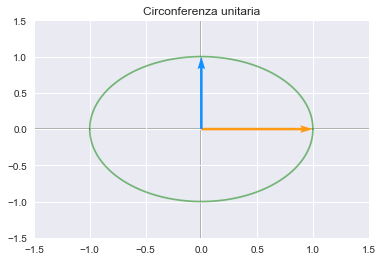

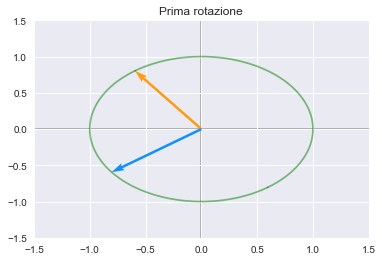

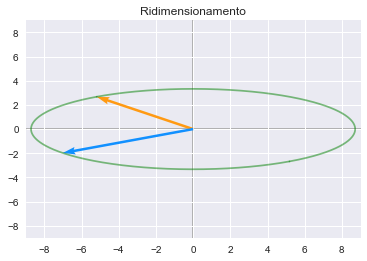

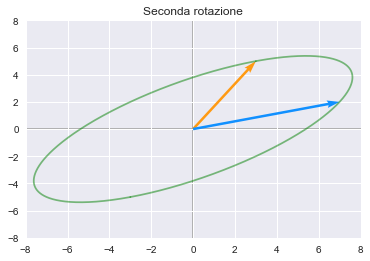

In [5]:
# circonferenza
pl.plot(B, 1.5, "Circonferenza unitaria")

# prima rotazione
pl.plot(V, 1.5, "Prima rotazione")

# ridimensionamento
pl.plot(np.diag(D).dot(V), 9, "Ridimensionamento")

# seconda rotazione
pl.plot(U.dot(np.diag(D)).dot(V), 8, "Seconda rotazione")

Per essere sicuri, compariamo l'ultimo passaggio con la trasformazione con $A$:

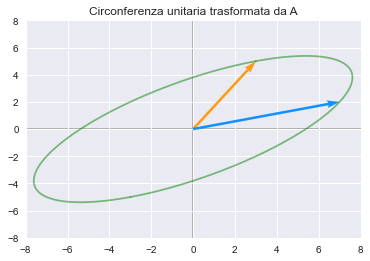

In [6]:
pl.plot(A, 8, "Circonferenza unitaria trasformata da A")